# <font style="color:blue">Assignment: Implement a CNN for Image Classification on CIFAR10 dataset</font>

We have seen how to implement a CNN (LeNet5 and LeNet with the batch norm) in the last section. We used MNIST and Fashion MNIST dataset which are grayscale or single channel datasets. In this assignment, you will implement a CNN Model ( similar to LeNet ) for classifying objects in the `CIFAR10` dataset. 

The CIFAR10 dataset has the following properties
1. It has `10` classes.  
1. It has colored images, so it has `3-channels`. 
1. The image shape is `32 x 32`.

Samples of CIFAR10- dataset ([source](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=cifar)):

<img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_cirar10.png" width=700>


# <font color='blue'>Marking Scheme</font>

### <font style="color:green">Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Implement the CNN Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Find Mean and Std of Training Data</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Model Training & Accuracy</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font color='blue'>Problem Description</font>

### <font color='blue'>1. Implement the CNN Model</font>
Since the task is to classify objects in a dataset of color images, you need to implement a CNN with 10 output classes. **Also, your model must use `Conv2d`, `BatchNorm2d`, and `ReLU`.** 

**You need to define the model architecture in the function: `MyModel` ( Step 1 )**

Hint: For color images you need to use an input shape that is different than the ones we have been using till now, so that it accepts 3 channel inputs.

### <font color='blue'>2. Find Mean and Std of Training Data</font>

It is a good practice to normalize the training data. To normalize the data, we need to compute mean and std. As the dataset has colored images, it has `3-channel` (RGB or BGR). We have to find mean and std per channel using training data. 

**You need to compute the mean and std for the dataset in the function: `get_mean_std_train_data` ( Step 3 )**

### <font color='blue'>3. Model Training and Accuracy</font>

Once you have defined the model, you can train it. To get better accuracy, you need to play around the training configuration **( Step 5 )** and even the model architecture. You can check the accuracy by running the training loop in `Step 11`.

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.

You need to achieve **75% accuracy** ( See Step11 ) in order to get full marks for this part. 

**You do not need to implement anything for this, just changing the parameters as mentioned above and running the Notebook will give you the accuracy. ( Step 5 and Step 11 )**

In [1]:
required_training = True

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt  # one of the best graphics library for python

In [4]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms
import torchvision

# <font style="color:blue">1. CNN Model Architecture [10 Points]</font>

You have to write the model code here. You can take reference from LeNet code.

If you do not get higher accuracy, here are a few hints:
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.


In [5]:
classes = 10
out_nodes = 1024


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=3, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=3, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 128, kernel_size=3, padding=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, out_nodes, kernel_size=3, padding=3),
            nn.BatchNorm2d(out_nodes),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(out_nodes * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, classes)
            #nn.Sigmoid(),
            #nn.Linear(1024, n_classes)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = x.view(-1, out_nodes * 5 * 5)

        x = self.decoder(x)
        
        return x

# <font style="color:blue">2. Display the Network</font>

In [6]:
my_model = MyModel()
print(my_model)

MyModel(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 128, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReL

In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">3. Find Mean and STD of CIFAR10 Data [5 Points]</font>

Function **`get_mean_std_train_data`** should `return` `mean` and `std` of training data. You can refer to the code used in the previous section for finding the mean and std of the training data.



In [11]:
def get_mean_std_train_data(data_root):
    
    # return mean (numpy.ndarray) and std (numpy.ndarray)
    transform = transforms.Compose([transforms.ToTensor()])
    
    loader = datasets.CIFAR10(root=data_root, train=True, download=False, transform=train_transform)

    mean = 0.
    std = 0.
    
    for images, _ in loader:
        batch_samples = images.size(0) # batch size (the last batch can have smaller size!)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)

    mean /= len(loader.dataset)
    std /= len(loader.dataset)
    
    print('mean: {}, std: {}'.format(mean, std))
    
    return mean, std



In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
def get_data(batch_size, data_root, num_workers=1):
    
    
    try:
        mean, std = get_mean_std_train_data(data_root)
        assert len(mean) == len(std) == 3
    except:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        
    
    train_test_transforms = transforms.Compose([
        # this re-scale image tensor values between 0-1. image_tensor /= 255
        transforms.ToTensor(),
        # subtract mean and divide by variance.
        transforms.Normalize(mean, std)
    ])
    
    # train dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=True, download=False, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    # test dataloader
    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(root=data_root, train=False, download=False, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, test_loader

# <font style="color:blue">4. System Configuration</font>


In [15]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 42  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

# <font style="color:blue">5. Training Configuration [15 Points]</font>
All training parameters are defined here. So, 
This is where you can improve your accuracy, apart from improving the architecture. 

Here are a few hints on how you can improve the accuracy:
- Train for longer duration
- Try with different learning rate

**You need to achieve 75% accuracy in order to get full marks for this part.**

**You will see the effect of these changes when you run Step 11**

In [16]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 4  # amount of data to pass through the network at each forward-backward iteration
    epochs_count: int = 2  # number of times the whole dataset will be passed through the network
    learning_rate: float = 0.1  # determines the speed of network's weights update
        
    log_interval: int = 100  # how many batches to wait between logging training status
    test_interval: int = 1  # how many epochs to wait before another test. Set to 1 to get val loss at each epoch
    data_root: str = "../resource/lib/publicdata/images"  # folder to save data
    num_workers: int = 10  # number of concurrent processes using to prepare data
    device: str = 'cuda'  # device to use for training.
    # update changed parameters in blow coding block.
    # Please do not change "data_root" 
    
    learning_rate: float = 0.001
    epochs_count: int = 10
    


# <font style="color:blue">6. System Setup</font>


In [17]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

# <font style="color:blue">7. Training</font>
We are familiar with the training pipeline used in PyTorch. The following steps are performed in the code below:

1. Send the data to the required device ( CPU/GPU )
1. Make a forward pass using the forward method.
1. Find the loss using the Cross_Entropy function.
1. Find the gradients using the backward function.
1. Update the weights using the optimizer.
1. Find the accuracy of the model

Repeat the above for the specified number of epochs.

In [18]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:
    
    # change model in training mood
    model.train()
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
        # cross entropy loss
        loss = F.cross_entropy(output, target)
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])

        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:              
            print(
                'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
                    epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc
                )
            )
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    return epoch_loss, epoch_acc

# <font style="color:blue">8. Validation</font>

After every few epochs **`validation`** will be called with the `trained model` and `test_loader` to get validation loss and accuracy.

In [19]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    return test_loss, accuracy/100.0

# <font style="color:blue">9. Saving the Model</font>

In [20]:
def save_model(model, device, model_dir='models', model_file_name='cifar10_cnn_model.pt'):
    

    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

# <font style="color:blue">10. Main</font>

In this section of code, we use the configuration parameters defined above and start the training. Here are the important actions being taken in the code below:

1. Set up system parameters like CPU/GPU, number of threads etc
1. Load the data using dataloaders
1. Create an instance of the LeNet model
1. Specify optimizer to use.
1. Set up variables to track loss and accuracy and start training.
1. If loss decreases, saving the model

In [21]:
def main(system_configuration=SystemConfiguration(), training_configuration=TrainingConfiguration()):
    
    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        num_workers_to_set = 2

    # data loader
    train_loader, test_loader = get_data(
        batch_size=training_configuration.batch_size,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set
    )
    
    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        num_workers=num_workers_to_set
    )

    # initiate model
    model = MyModel()
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    # optimizer
    optimizer = optim.SGD(
        model.parameters(),
        lr=training_configuration.learning_rate
    )

    best_loss = torch.tensor(np.inf)
    
    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)
        
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
        
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
                print('Loss decreases, saving the model.\n')
                save_model(model, device)
                
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:blue">Step 11: Start Training</font>
This is where you start the training. You may see that the training does not converge or does not give a good accuracy. You need to change 
- In Step 1: the network architecture and add a few more layers or more nodes to the already existing layers
- In Step 5: training parameters such as learning rate or batch_size or epochs so that the network converges or run the network for longer so that it gets more time to fit the data

**You need to make sure that the accuracy at the end is at least 75%.**

In [23]:
if required_training:
    model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc = main()

Train Epoch: 0 [400/50000] Loss: 2.244876 Acc: 0.0000
Train Epoch: 0 [800/50000] Loss: 2.139840 Acc: 0.2500
Train Epoch: 0 [1200/50000] Loss: 2.160743 Acc: 0.5000
Train Epoch: 0 [1600/50000] Loss: 1.873655 Acc: 0.5000
Train Epoch: 0 [2000/50000] Loss: 2.310671 Acc: 0.0000
Train Epoch: 0 [2400/50000] Loss: 2.165058 Acc: 0.2500
Train Epoch: 0 [2800/50000] Loss: 2.416102 Acc: 0.2500
Train Epoch: 0 [3200/50000] Loss: 1.558980 Acc: 0.2500
Train Epoch: 0 [3600/50000] Loss: 1.900173 Acc: 0.0000
Train Epoch: 0 [4000/50000] Loss: 2.306427 Acc: 0.0000
Train Epoch: 0 [4400/50000] Loss: 2.171228 Acc: 0.0000
Train Epoch: 0 [4800/50000] Loss: 1.650556 Acc: 0.5000
Train Epoch: 0 [5200/50000] Loss: 2.234816 Acc: 0.0000
Train Epoch: 0 [5600/50000] Loss: 1.785574 Acc: 0.0000
Train Epoch: 0 [6000/50000] Loss: 2.055778 Acc: 0.0000
Train Epoch: 0 [6400/50000] Loss: 1.834499 Acc: 0.5000
Train Epoch: 0 [6800/50000] Loss: 1.785418 Acc: 0.2500
Train Epoch: 0 [7200/50000] Loss: 1.132030 Acc: 1.0000
Train Epoch:

Train Epoch: 1 [8800/50000] Loss: 1.286754 Acc: 0.5000
Train Epoch: 1 [9200/50000] Loss: 0.962965 Acc: 0.7500
Train Epoch: 1 [9600/50000] Loss: 1.359139 Acc: 0.2500
Train Epoch: 1 [10000/50000] Loss: 3.227016 Acc: 0.2500
Train Epoch: 1 [10400/50000] Loss: 1.338070 Acc: 0.5000
Train Epoch: 1 [10800/50000] Loss: 1.585098 Acc: 0.5000
Train Epoch: 1 [11200/50000] Loss: 1.230463 Acc: 0.5000
Train Epoch: 1 [11600/50000] Loss: 0.941002 Acc: 0.7500
Train Epoch: 1 [12000/50000] Loss: 2.102760 Acc: 0.2500
Train Epoch: 1 [12400/50000] Loss: 1.947931 Acc: 0.5000
Train Epoch: 1 [12800/50000] Loss: 1.887119 Acc: 0.5000
Train Epoch: 1 [13200/50000] Loss: 1.884519 Acc: 0.5000
Train Epoch: 1 [13600/50000] Loss: 1.701638 Acc: 0.5000
Train Epoch: 1 [14000/50000] Loss: 0.916979 Acc: 0.5000
Train Epoch: 1 [14400/50000] Loss: 0.273408 Acc: 1.0000
Train Epoch: 1 [14800/50000] Loss: 2.001040 Acc: 0.2500
Train Epoch: 1 [15200/50000] Loss: 0.892504 Acc: 0.7500
Train Epoch: 1 [15600/50000] Loss: 1.567412 Acc: 0.

Train Epoch: 2 [17200/50000] Loss: 0.317657 Acc: 0.7500
Train Epoch: 2 [17600/50000] Loss: 0.497624 Acc: 1.0000
Train Epoch: 2 [18000/50000] Loss: 0.962580 Acc: 0.5000
Train Epoch: 2 [18400/50000] Loss: 0.588855 Acc: 1.0000
Train Epoch: 2 [18800/50000] Loss: 0.759470 Acc: 0.5000
Train Epoch: 2 [19200/50000] Loss: 0.618821 Acc: 1.0000
Train Epoch: 2 [19600/50000] Loss: 0.297668 Acc: 1.0000
Train Epoch: 2 [20000/50000] Loss: 1.535332 Acc: 0.5000
Train Epoch: 2 [20400/50000] Loss: 0.857321 Acc: 0.5000
Train Epoch: 2 [20800/50000] Loss: 1.079455 Acc: 0.5000
Train Epoch: 2 [21200/50000] Loss: 1.635888 Acc: 0.7500
Train Epoch: 2 [21600/50000] Loss: 0.680924 Acc: 0.7500
Train Epoch: 2 [22000/50000] Loss: 1.329593 Acc: 0.2500
Train Epoch: 2 [22400/50000] Loss: 0.889693 Acc: 0.7500
Train Epoch: 2 [22800/50000] Loss: 1.355102 Acc: 0.5000
Train Epoch: 2 [23200/50000] Loss: 0.848294 Acc: 0.7500
Train Epoch: 2 [23600/50000] Loss: 1.490303 Acc: 0.2500
Train Epoch: 2 [24000/50000] Loss: 0.497898 Acc:

Train Epoch: 3 [25200/50000] Loss: 1.174664 Acc: 0.5000
Train Epoch: 3 [25600/50000] Loss: 1.220695 Acc: 0.5000
Train Epoch: 3 [26000/50000] Loss: 0.943364 Acc: 0.7500
Train Epoch: 3 [26400/50000] Loss: 1.445900 Acc: 0.5000
Train Epoch: 3 [26800/50000] Loss: 1.838753 Acc: 0.2500
Train Epoch: 3 [27200/50000] Loss: 0.639491 Acc: 0.5000
Train Epoch: 3 [27600/50000] Loss: 0.564963 Acc: 0.7500
Train Epoch: 3 [28000/50000] Loss: 0.486952 Acc: 0.7500
Train Epoch: 3 [28400/50000] Loss: 1.611027 Acc: 0.2500
Train Epoch: 3 [28800/50000] Loss: 1.056786 Acc: 0.7500
Train Epoch: 3 [29200/50000] Loss: 1.289418 Acc: 0.5000
Train Epoch: 3 [29600/50000] Loss: 0.120854 Acc: 1.0000
Train Epoch: 3 [30000/50000] Loss: 0.988542 Acc: 0.5000
Train Epoch: 3 [30400/50000] Loss: 1.215485 Acc: 0.5000
Train Epoch: 3 [30800/50000] Loss: 0.693082 Acc: 0.7500
Train Epoch: 3 [31200/50000] Loss: 0.320457 Acc: 1.0000
Train Epoch: 3 [31600/50000] Loss: 1.650669 Acc: 0.5000
Train Epoch: 3 [32000/50000] Loss: 0.805484 Acc:

Train Epoch: 4 [33200/50000] Loss: 0.123256 Acc: 1.0000
Train Epoch: 4 [33600/50000] Loss: 0.509031 Acc: 0.7500
Train Epoch: 4 [34000/50000] Loss: 0.089848 Acc: 1.0000
Train Epoch: 4 [34400/50000] Loss: 0.354744 Acc: 1.0000
Train Epoch: 4 [34800/50000] Loss: 1.254205 Acc: 0.5000
Train Epoch: 4 [35200/50000] Loss: 0.147680 Acc: 1.0000
Train Epoch: 4 [35600/50000] Loss: 0.576388 Acc: 0.5000
Train Epoch: 4 [36000/50000] Loss: 1.315755 Acc: 0.5000
Train Epoch: 4 [36400/50000] Loss: 1.812080 Acc: 0.2500
Train Epoch: 4 [36800/50000] Loss: 0.484428 Acc: 0.7500
Train Epoch: 4 [37200/50000] Loss: 0.764879 Acc: 0.2500
Train Epoch: 4 [37600/50000] Loss: 1.002053 Acc: 0.7500
Train Epoch: 4 [38000/50000] Loss: 0.569770 Acc: 0.7500
Train Epoch: 4 [38400/50000] Loss: 1.591698 Acc: 0.7500
Train Epoch: 4 [38800/50000] Loss: 0.541597 Acc: 0.7500
Train Epoch: 4 [39200/50000] Loss: 0.306578 Acc: 1.0000
Train Epoch: 4 [39600/50000] Loss: 0.713101 Acc: 0.7500
Train Epoch: 4 [40000/50000] Loss: 0.405020 Acc:

Train Epoch: 5 [41600/50000] Loss: 0.130119 Acc: 1.0000
Train Epoch: 5 [42000/50000] Loss: 0.213465 Acc: 1.0000
Train Epoch: 5 [42400/50000] Loss: 0.439601 Acc: 0.7500
Train Epoch: 5 [42800/50000] Loss: 0.710159 Acc: 0.7500
Train Epoch: 5 [43200/50000] Loss: 0.031658 Acc: 1.0000
Train Epoch: 5 [43600/50000] Loss: 1.671353 Acc: 0.2500
Train Epoch: 5 [44000/50000] Loss: 0.818791 Acc: 0.7500
Train Epoch: 5 [44400/50000] Loss: 0.925305 Acc: 0.5000
Train Epoch: 5 [44800/50000] Loss: 0.728174 Acc: 0.7500
Train Epoch: 5 [45200/50000] Loss: 0.858846 Acc: 0.5000
Train Epoch: 5 [45600/50000] Loss: 0.717660 Acc: 0.7500
Train Epoch: 5 [46000/50000] Loss: 0.708151 Acc: 0.7500
Train Epoch: 5 [46400/50000] Loss: 0.258595 Acc: 1.0000
Train Epoch: 5 [46800/50000] Loss: 0.523241 Acc: 0.7500
Train Epoch: 5 [47200/50000] Loss: 1.473590 Acc: 0.7500
Train Epoch: 5 [47600/50000] Loss: 0.891741 Acc: 0.7500
Train Epoch: 5 [48000/50000] Loss: 1.278206 Acc: 0.5000
Train Epoch: 5 [48400/50000] Loss: 0.110771 Acc:

Train Epoch: 6 [49600/50000] Loss: 0.840604 Acc: 0.2500
Elapsed 4206.58s, 600.94 s/epoch, 0.05 s/batch, ets 1802.82s

Test set: Average loss: 0.8585, Accuracy: 7100/10000 (71%)

Loss decreases, saving the model.

Train Epoch: 7 [400/50000] Loss: 0.082203 Acc: 1.0000
Train Epoch: 7 [800/50000] Loss: 0.135679 Acc: 1.0000
Train Epoch: 7 [1200/50000] Loss: 0.421553 Acc: 1.0000
Train Epoch: 7 [1600/50000] Loss: 0.089940 Acc: 1.0000
Train Epoch: 7 [2000/50000] Loss: 0.714897 Acc: 0.5000
Train Epoch: 7 [2400/50000] Loss: 0.582300 Acc: 0.7500
Train Epoch: 7 [2800/50000] Loss: 0.870960 Acc: 0.5000
Train Epoch: 7 [3200/50000] Loss: 0.335447 Acc: 0.7500
Train Epoch: 7 [3600/50000] Loss: 0.053354 Acc: 1.0000
Train Epoch: 7 [4000/50000] Loss: 0.174664 Acc: 1.0000
Train Epoch: 7 [4400/50000] Loss: 0.837780 Acc: 0.7500
Train Epoch: 7 [4800/50000] Loss: 0.991089 Acc: 0.5000
Train Epoch: 7 [5200/50000] Loss: 0.066108 Acc: 1.0000
Train Epoch: 7 [5600/50000] Loss: 0.349865 Acc: 1.0000
Train Epoch: 7 [600

Train Epoch: 8 [7600/50000] Loss: 0.124550 Acc: 1.0000
Train Epoch: 8 [8000/50000] Loss: 0.326318 Acc: 0.7500
Train Epoch: 8 [8400/50000] Loss: 0.037121 Acc: 1.0000
Train Epoch: 8 [8800/50000] Loss: 0.120353 Acc: 1.0000
Train Epoch: 8 [9200/50000] Loss: 0.520795 Acc: 0.5000
Train Epoch: 8 [9600/50000] Loss: 0.240727 Acc: 0.7500
Train Epoch: 8 [10000/50000] Loss: 0.119180 Acc: 1.0000
Train Epoch: 8 [10400/50000] Loss: 0.496149 Acc: 0.7500
Train Epoch: 8 [10800/50000] Loss: 0.005858 Acc: 1.0000
Train Epoch: 8 [11200/50000] Loss: 0.226526 Acc: 1.0000
Train Epoch: 8 [11600/50000] Loss: 0.360260 Acc: 1.0000
Train Epoch: 8 [12000/50000] Loss: 0.405687 Acc: 1.0000
Train Epoch: 8 [12400/50000] Loss: 0.228046 Acc: 0.7500
Train Epoch: 8 [12800/50000] Loss: 0.011202 Acc: 1.0000
Train Epoch: 8 [13200/50000] Loss: 0.375133 Acc: 0.7500
Train Epoch: 8 [13600/50000] Loss: 0.444283 Acc: 0.7500
Train Epoch: 8 [14000/50000] Loss: 0.254734 Acc: 1.0000
Train Epoch: 8 [14400/50000] Loss: 0.038771 Acc: 1.000

Train Epoch: 9 [16000/50000] Loss: 0.474605 Acc: 0.7500
Train Epoch: 9 [16400/50000] Loss: 0.296916 Acc: 1.0000
Train Epoch: 9 [16800/50000] Loss: 0.390301 Acc: 0.7500
Train Epoch: 9 [17200/50000] Loss: 0.842707 Acc: 0.7500
Train Epoch: 9 [17600/50000] Loss: 0.878446 Acc: 0.5000
Train Epoch: 9 [18000/50000] Loss: 0.263058 Acc: 0.7500
Train Epoch: 9 [18400/50000] Loss: 0.008028 Acc: 1.0000
Train Epoch: 9 [18800/50000] Loss: 0.085034 Acc: 1.0000
Train Epoch: 9 [19200/50000] Loss: 0.022222 Acc: 1.0000
Train Epoch: 9 [19600/50000] Loss: 0.497271 Acc: 0.7500
Train Epoch: 9 [20000/50000] Loss: 0.493585 Acc: 0.7500
Train Epoch: 9 [20400/50000] Loss: 0.575909 Acc: 0.7500
Train Epoch: 9 [20800/50000] Loss: 0.021553 Acc: 1.0000
Train Epoch: 9 [21200/50000] Loss: 0.031320 Acc: 1.0000
Train Epoch: 9 [21600/50000] Loss: 0.070877 Acc: 1.0000
Train Epoch: 9 [22000/50000] Loss: 0.068315 Acc: 1.0000
Train Epoch: 9 [22400/50000] Loss: 0.471489 Acc: 0.7500
Train Epoch: 9 [22800/50000] Loss: 0.071644 Acc:

# <font style="color:blue">12. Plot Loss</font>

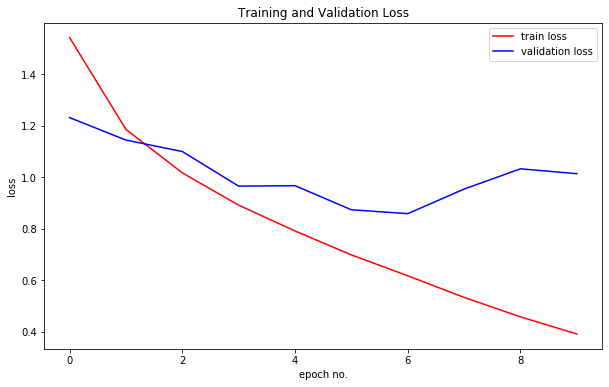

In [24]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_loss, color='r', label="train loss")
plt.plot(x, epoch_test_loss, color='b', label="validation loss")
plt.xlabel('epoch no.')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# <font style="color:blue">13. Plot Accuracy</font>

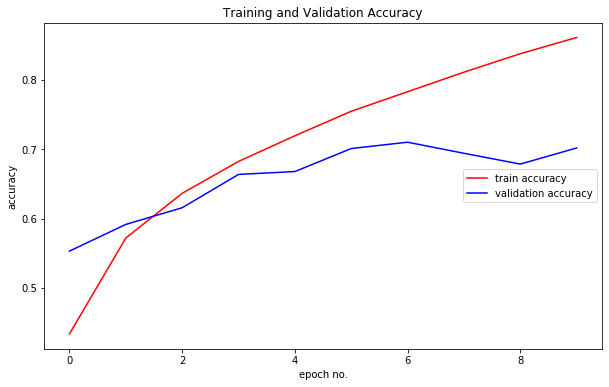

In [25]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))


plt.figure
plt.plot(x, epoch_train_acc, color='r', label="train accuracy")
plt.plot(x, epoch_test_acc, color='b', label="validation accuracy")
plt.xlabel('epoch no.')
plt.ylabel('accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')
plt.show()

# <font style="color:blue">14. Loading the Model </font>


In [26]:
# initialize the model
cnn_model = MyModel()

models = 'models'

model_file_name = 'cifar10_cnn_model.pt'

model_path = os.path.join(models, model_file_name)

# loading the model and getting model parameters by using load_state_dict
cnn_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# <font style="color:blue">15. Model Prediction</font>


In [27]:
def prediction(model, train_config, batch_input):
    
    # send model to cpu/cuda according to your system configuration
    model.to(train_config.device)
    
    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(train_config.device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]
    
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

# <font style="color:blue">16. Perform Inference on sample images </font>

For prediction, we need to transform the data in the same way as we have done during training. 

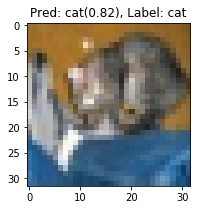

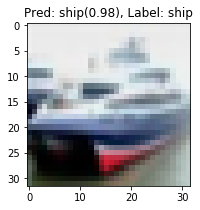

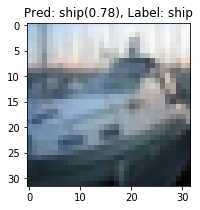

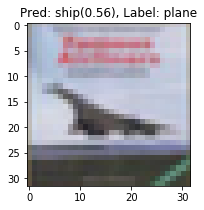

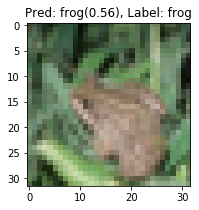

In [28]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

batch_size = 5
train_config = TrainingConfiguration()

if torch.cuda.is_available():
    train_config.device = "cuda"
else:
    train_config.device = "cpu"
    
    

# load test data without image transformation
test = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False, 
                   transform=transforms.functional.to_tensor),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

try:
    mean, std = get_mean_std_train_data(data_root)
    assert len(mean) == len(std) == 3
except:
    mean = (0.5, 0.5, 0.5)
    std = (0.5, 0.5, 0.5)

# load testdata with image transformation
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

test_trans = torch.utils.data.DataLoader(
    datasets.CIFAR10(root=train_config.data_root, train=False, download=False, transform=image_transforms),
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
    )

for data, _ in test_trans:
    # pass the loaded model
    pred, prob = prediction(cnn_model, train_config, data)
    break
    

plt.rcParams["figure.figsize"] = (3, 3)
for images, label in test:
    for i, img in enumerate(images):
        img = transforms.functional.to_pil_image(img)
        plt.imshow(img)
        plt.gca().set_title('Pred: {0}({1:0.2}), Label: {2}'.format(classes[pred[i]], prob[i], classes[label[i]]))
        plt.show()
    break

# <font style="color:blue">17. Report your findings</font>
- Lowering learning rate helps
- Adding a convolutional layer helps
- Increasing epochs helps when learning rate is low
- Decreasing batch size ...

# <font style="color:blue">References</font>

1. https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
1. https://pytorch.org/tutorials/beginner/saving_loading_models.html